In [70]:
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Embedding, Dense, Activation, Input
import matplotlib.pyplot as plt
import sys

import gzip
import random
from keras import backend as K
from sklearn import manifold
from sklearn.svm import LinearSVC
import math
from itertools import combinations 
from itertools import permutations
from importlib import reload

sys.path.append('/Users/anastasia/Desktop/randtensor')
import utils as u
import randtensor as r
reload(u)
reload(r)

import matplotlib.patches as mpatches

In [29]:
#get a T,N,C tensor
T = 5420
C = 8
N = 100

data = np.reshape(layer2_output_new, (T,C,N), order = 'F') 

data = np.swapaxes(data,1,2)

#shape is now (T,N,C)

In [30]:
###calculate marginal means and mean-center

def mean_center(data, T = 1000, C = 8, N = 100): 

    X = data

    for t_value in range(T):

        current_mean = np.mean(data[t_value,:,:])
    
        for n_value in range(N):
        
            for c_value in range(C):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
    for n_value in range(N):
    
        current_mean = np.mean(data[:,n_value,:])

        for t_value in range(T):
        
            for c_value in range(C):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
    for c_value in range(C):

        current_mean = np.mean(data[:,:,c_value])
    
        for n_value in range(N):
        
            for t_value in range(T):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
        
        
    total_sum = 0
    current_sum = 0

#mean across T
    for n_value in range(N):
    
        for c_value in range(C):
        
            current_sum = X[:,n_value, c_value]
        
            total_sum += current_sum
        
        
    total_mean = total_sum/ (N*C)

    print(np.mean(total_mean))


#mean across N
    total_sum = 0
    current_sum = 0

    for t_value in range(T):
    
        for c_value in range(C):
        
            current_sum = X[t_value,:, c_value]
        
            total_sum += current_sum
        
        
    total_mean = total_sum/ (T*C)

    print(np.mean(total_mean))



#mean across C
    total_sum = 0
    current_sum = 0

    for t_value in range(T):
    
        for n_value in range(N):
        
            current_sum = X[t_value,n_value, :]
        
            total_sum += current_sum
        
        
    total_mean = total_sum/ (T*N)

    print(np.mean(total_mean))
        
    
    return X

In [31]:
data = mean_center(data)

-3.981926914709779e-18
1.97758476261356e-18
-7.399679827213568e-18


In [32]:
#calculate covariances for 100 x (1000*8) and the 8 x (1000*100) matrices
#def cov(data, T = 1000, C = 8, N = 100):
    #(T,N,C) to (N,T,C)
    
X = data    
data_N = np.swapaxes(X,0,1)



    #(T,N,C) to (C,N,T)
data_C = np.swapaxes(X,0,2)

    #shape (N, (T*C))
sigma_N_data = np.reshape(data_N, (N, (T*C)), order = 'f')

    #shape (C, (T*N))
sigma_C_data = np.reshape(data_C, (C, (N*T)), order = 'f')


sigma_N = np.zeros((100,100))

for a in range(N):
    
    for b in range(N):
    
        sigma_N[a,b] = np.matmul(sigma_N_data[a,:], sigma_N_data[b,:].T)


sigma_C = np.zeros((8,8))

for a in range(C):
    
    for b in range(C):
    
        sigma_C[a,b] = np.matmul(sigma_C_data[a,:], sigma_C_data[b,:].T)
        
sigma_C_trace = np.trace(sigma_C)
sigma_N_trace = np.trace(sigma_N)
        
#sigma_C = sigma_C / np.trace(sigma_C)
#sigma_N = sigma_N / np.trace(sigma_N)

print(sigma_C_trace)
print(sigma_N_trace)
    

2266838.4355222145
2266838.4355222145


In [33]:
original_sigma_T = np.zeros((1000,1000))

for a in range(1000):
    original_sigma_T[a,a] = 2266838.4355222145/1000
  
print(np.trace(original_sigma_T))

2266838.435522215


In [34]:
original_sigma_C = sigma_C
original_sigma_N = sigma_N

In [35]:
sizes = (N, C, 1000)
covs = [original_sigma_N, original_sigma_C, original_sigma_T]

rand = r.randtensor(sizes)
rand.fitMaxEntropy(covs)


fitting max entropy...
algorithm did not completely converged. error = 0.0000575887 
 results may be inaccurate


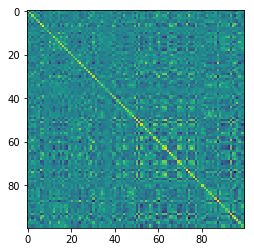

In [36]:
plt.imshow(original_sigma_N)


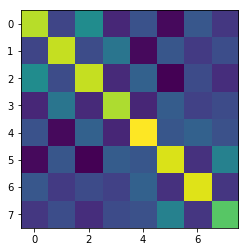

In [37]:
plt.imshow(original_sigma_C)


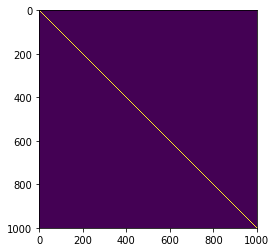

In [38]:
plt.imshow(original_sigma_T)

In [39]:
surrogates = rand.sampleTensors(100)

In [40]:
surrogates[0].shape

(100, 8, 1000)

In [41]:
#dataset = np.stack(surrogates)
#dataset = np.swapaxes(dataset,1,2)
dataset = np.swapaxes(surrogates[0],0,2)
dataset = np.swapaxes(dataset,1,2)
dataset.shape

#dataset = np.reshape(dataset, (8000, 100), order = 'f')



(1000, 100, 8)

In [42]:
#code for calculating covariances
X = dataset
data = dataset
T = 1000
N = 100
C = 8

for t_value in range(T):

    current_mean = np.mean(data[t_value,:,:])
    
    for n_value in range(N):
        
        for c_value in range(C):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for n_value in range(N):
    
    current_mean = np.mean(data[:,n_value,:])

    for t_value in range(T):
        
        for c_value in range(C):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for c_value in range(C):

    current_mean = np.mean(data[:,:,c_value])
    
    for n_value in range(N):
        
        for t_value in range(T):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    

In [43]:
#check for mean-centering
total_sum = 0
current_sum = 0
T = 1000

#mean across T
for n_value in range(N):
    
    for c_value in range(C):
        
        current_sum = X[:,n_value, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (N*C)

print(np.mean(total_mean))


#mean across N
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for c_value in range(C):
        
        current_sum = X[t_value,:, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*C)

print(np.mean(total_mean))



#mean across C
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for n_value in range(N):
        
        current_sum = X[t_value,n_value, :]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*N)

print(np.mean(total_mean))
        
        

-1.3149533545364633e-17
-1.4070264051091464e-17
-4.418687638008122e-18


In [44]:
#calculate covariances for 100 x (1000*8) and the 8 x (1000*100) matrices
T = 1000
#(T,N,C) to (N,T,C)
data_N = np.swapaxes(X,0,1)
print(data_N.shape)
data_T = X

#(T,N,C) to (C,N,T)
data_C = np.swapaxes(X,0,2)

#shape (N, (T*C))
sigma_N_data = np.reshape(data_N, (N, (T*C)), order = 'f')

#shape (C, (T*N))
sigma_C_data = np.reshape(data_C, (C, (N*T)), order = 'f')


sigma_T_data = np.reshape(data_T, (T, (N*C)), order = 'f')


sigma_N = np.zeros((100,100))

for a in range(N):
    
    for b in range(N):
    
        sigma_N[a,b] = np.matmul(sigma_N_data[a,:], sigma_N_data[b,:].T)


sigma_C = np.zeros((8,8))

for a in range(C):
    
    for b in range(C):
    
        sigma_C[a,b] = np.matmul(sigma_C_data[a,:], sigma_C_data[b,:].T)
        
        
sigma_T = np.zeros((1000,1000))

for a in range(1000):
    
    for b in range(1000):
    
        sigma_T[a,b] = np.matmul(sigma_T_data[a,:], sigma_T_data[b,:].T)
        
        
        
sigma_C_trace = np.trace(sigma_C)
sigma_N_trace = np.trace(sigma_N)
sigma_T_trace = np.trace(sigma_T) 
        
#sigma_C = sigma_C / np.trace(sigma_C)
#sigma_N = sigma_N / np.trace(sigma_N)

print(sigma_C_trace)
print(sigma_N_trace)
print(sigma_T_trace)

(100, 1000, 8)
2272712.776657965
2272712.7766579636
2272712.7766579636


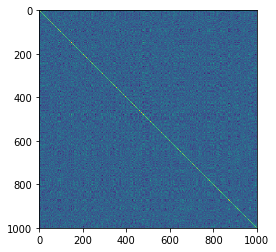

In [45]:
plt.imshow(sigma_T)

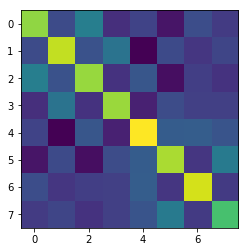

In [81]:
plt.imshow(sigma_C)

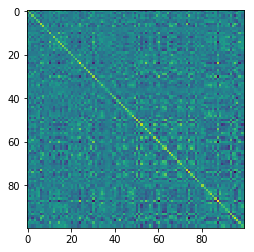

In [47]:
plt.imshow(sigma_N)

In [48]:
#normal frobenius norm
sigma_C_norm = np.linalg.norm(original_sigma_C)
sigma_N_norm = np.linalg.norm(original_sigma_N)
sigma_T_norm = np.linalg.norm(original_sigma_T)

In [58]:
surrogates = rand.sampleTensors(1000)

In [60]:
#surrogates = rand.sampleTensors(100)


avg_sigma_C = np.zeros((8,8))
avg_sigma_T = np.zeros((1000,1000))
avg_sigma_N = np.zeros((100,100))


sigma_C_norms = []
sigma_T_norms = []
sigma_N_norms = []

for i in range(1000):
    
    dataset = np.swapaxes(surrogates[i],0,2)
    dataset = np.swapaxes(dataset,1,2)
    
    #code for calculating covariances
    X = dataset

    for t_value in range(T):

        current_mean = np.mean(data[t_value,:,:])
    
        for n_value in range(N):
        
            for c_value in range(C):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
    for n_value in range(N):
    
        current_mean = np.mean(data[:,n_value,:])

        for t_value in range(T):
        
            for c_value in range(C):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
    for c_value in range(C):

        current_mean = np.mean(data[:,:,c_value])
    
        for n_value in range(N):
        
            for t_value in range(T):
    
                X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    T = 1000
#(T,N,C) to (N,T,C)
    data_N = np.swapaxes(X,0,1)
    data_T = X

#(T,N,C) to (C,N,T)
    data_C = np.swapaxes(X,0,2)

#shape (N, (T*C))
    sigma_N_data = np.reshape(data_N, (N, (T*C)), order = 'f')

#shape (C, (T*N))
    sigma_C_data = np.reshape(data_C, (C, (N*T)), order = 'f')


    sigma_T_data = np.reshape(data_T, (T, (N*C)), order = 'f')


    sigma_N = np.zeros((100,100))

    for a in range(N):
    
        for b in range(N):
    
            sigma_N[a,b] = np.matmul(sigma_N_data[a,:], sigma_N_data[b,:].T)


    sigma_C = np.zeros((8,8))

    for a in range(C):
    
        for b in range(C):
    
            sigma_C[a,b] = np.matmul(sigma_C_data[a,:], sigma_C_data[b,:].T)
        
        
    sigma_T = np.zeros((1000,1000))

    for a in range(1000):
    
        for b in range(1000):
    
            sigma_T[a,b] = np.matmul(sigma_T_data[a,:], sigma_T_data[b,:].T)
        
        
        
    sigma_C_trace = np.trace(sigma_C)
    sigma_N_trace = np.trace(sigma_N)
    sigma_T_trace = np.trace(sigma_T) 
        

    #print(sigma_C_trace)
    #print(sigma_N_trace)
    #print(sigma_T_trace)
    
    avg_sigma_C += sigma_C
    avg_sigma_N += sigma_N
    avg_sigma_T += sigma_T
    
    #if i in [10, 20,30,40,50,60,70,80,90,100]:
    if i in [10, 50, 100, 200, 500, 750, 990]:
    
        updated_sigma_N_norm = np.linalg.norm(avg_sigma_N/i)
        percent_diff_N = (100*abs(updated_sigma_N_norm-sigma_N_norm))/sigma_N_norm
        print(percent_diff_N)
        sigma_N_norms.append(percent_diff_N)
        
        updated_sigma_C_norm = np.linalg.norm(avg_sigma_C/i)
        percent_diff_C = (100*abs(updated_sigma_C_norm-sigma_C_norm))/sigma_C_norm
        print(percent_diff_C)
        sigma_C_norms.append(percent_diff_C)    
    
        updated_sigma_T_norm = np.linalg.norm(avg_sigma_T/i)
        percent_diff_T = (100*abs(updated_sigma_T_norm-sigma_T_norm))/sigma_T_norm
        print(percent_diff_T)
        sigma_T_norms.append(percent_diff_T)    
    


7.594948297083689
8.072229022115843
81.63374435906057
0.02678935485814566
0.4337196221475078
19.620937036359997
1.0501181004626063
0.567445509142836
10.079630936312562
1.5391641504625433
1.0339670665123246
5.102639120568383
1.7718493528565868
1.2852848160278882
2.0662232468705097
1.8349039087066625
1.3451127842008408
1.3739104230544885
1.8556432847910413
1.369606480290022
1.0346969867957068


##### 

In [61]:
#percent_diff_C = (100*abs(avg_sigma_C-sigma_C))/sigma_C
#percent_diff_N = (100*abs(avg_sigma_N-sigma_N))/sigma_N
#percent_diff_T = (100*abs(avg_sigma_T-sigma_T))/sigma_T
print(sigma_C_norms)
print(sigma_N_norms)
print(sigma_T_norms)

[8.072229022115843, 0.4337196221475078, 0.567445509142836, 1.0339670665123246, 1.2852848160278882, 1.3451127842008408, 1.369606480290022]
[7.594948297083689, 0.02678935485814566, 1.0501181004626063, 1.5391641504625433, 1.7718493528565868, 1.8349039087066625, 1.8556432847910413]
[81.63374435906057, 19.620937036359997, 10.079630936312562, 5.102639120568383, 2.0662232468705097, 1.3739104230544885, 1.0346969867957068]


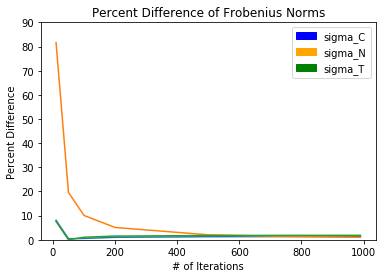

In [74]:
plt.plot([10, 50, 100, 200, 500, 750, 990], sigma_C_norms)
plt.plot([10, 50, 100, 200, 500, 750, 990], sigma_T_norms)
plt.plot([10, 50, 100, 200, 500, 750, 990], sigma_N_norms)
plt.xlabel('# of Iterations')
plt.ylabel('Percent Difference')
plt.ylim(0,90)
plt.title('Percent Difference of Frobenius Norms')

C_patch = mpatches.Patch(color='blue', label='sigma_C')
N_patch = mpatches.Patch(color='orange', label='sigma_N')
T_patch = mpatches.Patch(color='green', label='sigma_T')
plt.legend(handles=[C_patch, N_patch, T_patch])

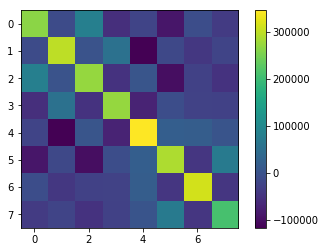

In [75]:
plt.imshow(avg_sigma_C/1000)
plt.colorbar()

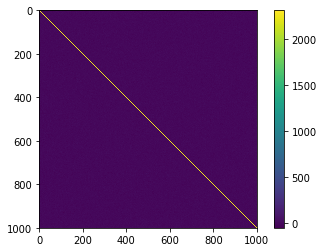

In [76]:
plt.imshow(avg_sigma_T/1000)
plt.colorbar()

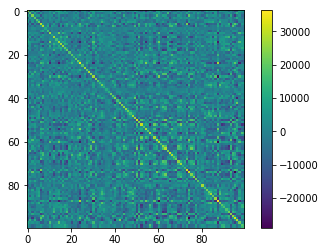

In [79]:
plt.imshow(avg_sigma_N/1000)
plt.colorbar()

In [100]:
percent_diff_T

array([[  30.48531024, -140.93003762, -115.5745874 , ...,  -95.25866076,
         116.05669786,   90.2154703 ],
       [-140.93003762,    1.71417352,   62.73929552, ..., -120.7178462 ,
         146.86733487, -110.77874513],
       [-115.5745874 ,   62.73929552,   26.17536967, ...,  187.53654205,
         -77.1736975 ,   -1.48671021],
       ...,
       [ -95.25866076, -120.7178462 ,  187.53654205, ...,   19.94741016,
          43.93154413, -156.81072776],
       [ 116.05669786,  146.86733487,  -77.1736975 , ...,   43.93154413,
           1.00896748,   99.49010929],
       [  90.2154703 , -110.77874513,   -1.48671021, ..., -156.81072776,
          99.49010929,   14.83300417]])